In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import svm
import pandas as pd
import glob
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from ast import literal_eval
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import numpy as np
files=glob.glob('pre_prcessed_training_sequence/*.gzip')
total_training_data=pd.DataFrame([])
for f in tqdm(files):
    total_training_data=pd.concat([total_training_data,pd.read_parquet(f, engine='auto')],axis=0)
total_training_data=total_training_data.sort_values(['Subject','Session','time_stamp'])
total_training_data=total_training_data.reset_index()
total_training_data['epoch'] = total_training_data['time_stamp'].sub(pd.Timestamp('1970-01-01 00:00:00.000'))
total_training_data['epoch']=total_training_data['epoch'].dt.total_seconds()
total_training_data=total_training_data[['Subject','Session','epoch','measurements','labels']]
total_training_data['measurements']=total_training_data['measurements'].apply(lambda x: np.vstack(x))
Subjects=list(set(total_training_data.Subject))
Sessions=[list(set(total_training_data[total_training_data.Subject==i]['Session'])) for i in Subjects]

100%|███████████████████████████████████████| 29/29 [00:01<00:00, 22.47it/s]


In [20]:
total_training_data['measurements'][0].shape

(4, 6)

ValueError: array length 37890 does not match index length 9473

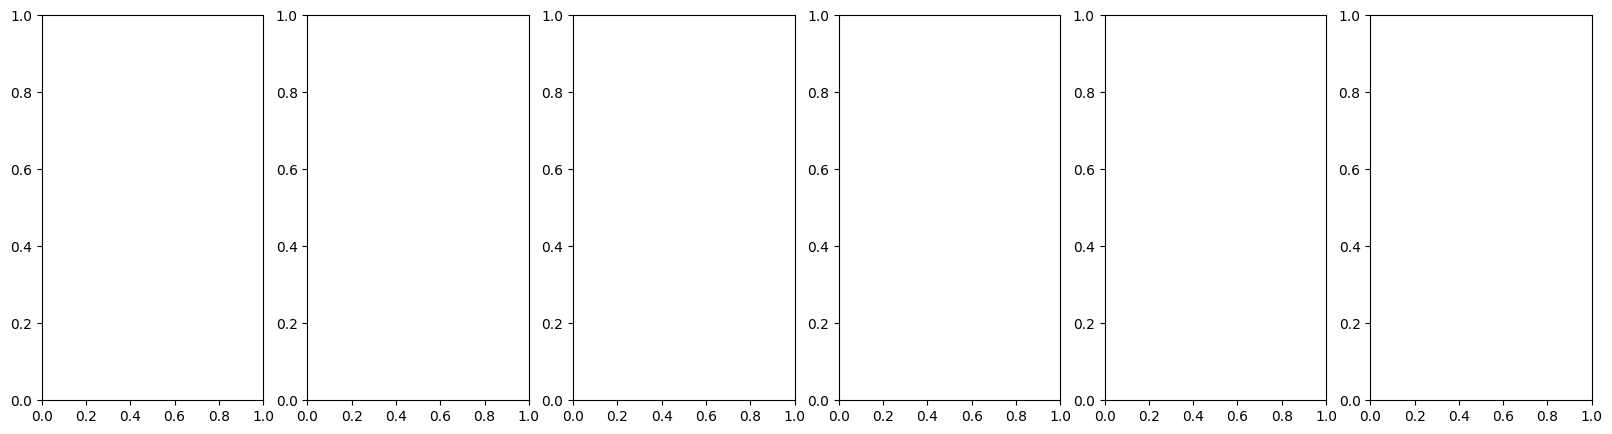

In [21]:
for sub in range(len(Subjects)):
    sub_session=Sessions[sub]
    for sess in sub_session:  
        sensors=['acc_x','acc_y','acc_z','gyro_x','gyro_y','gyro_z']
        s_label_dist=['Solid Ground(0)','Downstairs(1)','Upstairs(2)','Grass(3)']
        fig,ax=plt.subplots(1,6,figsize=(20,5))
        sess_1=total_training_data[(total_training_data.Subject==Subjects[sub])&(total_training_data.Session==sess)][['epoch','measurements','labels']]
        y=np.vstack(sess_1.measurements).T
        for s in range(len(sensors)):
            sns.lineplot( x=sess_1.epoch, y=y[s],palette="tab10",hue=sess_1.labels,ax=ax[s])
            
 #           ax[s].plot(sess_1.epoch,y[s],c='r')
  #          ax[s].plot(sess_1.epoch,sess_1.labels,c='g',label=f"Subject:{Subjects[sub]}_Session:{sess}_{sensors[s]}")
            ax[s].legend()

In [ ]:
Subjects

In [ ]:
for sub in range(len(Subjects)):
    print('Subject:',sub+1)
    sub_session=Sessions[sub]
    for sess in sub_session:  
        print('Session:',sess)
        sensors=['acc_x','acc_y','acc_z','gyro_x','gyro_y','gyro_z']
        s_label_dist=['Solid Ground(0)','Downstairs(1)','Upstairs(2)','Grass(3)']
        fig,ax=plt.subplots(4,6,figsize=(20,10))
        for _ in range(4):
            sess_1=total_training_data[(total_training_data.labels==_)&(total_training_data.Subject==Subjects[sub])&(total_training_data.Session==sess)][['epoch','measurements','labels']]
            y=np.vstack(sess_1.measurements).T
            for s in range(len(sensors)):
                ax[_,s].plot(sess_1.epoch,y[s],c='r',label=f"{s_label_dist[_]}_{sensors[s]}")
                ax[_,s].legend()
        

In [ ]:
sess_1=total_training_data[(total_training_data.Subject==1)&(total_training_data.Session==2)][['epoch','measurements','labels']].reset_index(drop=True)




In [ ]:
sess_1['epoch'][len(sess_1)-1]-sess_1['epoch'][0]

In [ ]:
sess_1['epoch'][len(sess_1)-1]-sess_1['epoch'][0]

In [ ]:
total_training_data_grouped=total_training_data.groupby(['Subject','Session','epoch']).agg({'measurements':[np.mean],'labels':[np.mean]})
total_training_data_grouped.columns = total_training_data_grouped.columns.droplevel(1)
total_training_data_grouped=total_training_data_grouped.reset_index(level=['epoch'])
total_training_data_grouped.to_parquet(f"combined_sampled/training.gzip",compression='gzip')

In [ ]:
total_training_data_g=total_training_data_g.reset_index(level=['epoch'])

In [ ]:
total_training_data_g

In [ ]:
total_training_data_grouped

In [ ]:
total_training_data_g=total_training_data_grouped.copy()

In [ ]:
total_training_data_g.columns = total_training_data_g.columns.droplevel(1)

In [ ]:
total_training_data_g

In [ ]:
total_training_data['time_stamp'][2].time()

In [ ]:
s_time_interv=total_training_data.groupby(pd.Grouper(freq=))

In [ ]:
pr=list(total_training_data.iloc[4])

In [ ]:
total_training_data.iloc[4].to_dict()

In [ ]:
pr.index

In [ ]:
subject=1
sample=total_training_data

s_time_interv= total_training_data[['Subject','Session','time_stamp']]
s_time_interv=s_time_interv.groupby(['Subject','Session']).agg({'time_stamp': [np.min,np.max]})
s_time_interv.columns=s_time_interv.columns.droplevel()
s_time_interv['time_interval']=s_time_interv['amax']-s_time_interv['amin']
s_time_interv['time_interval']=s_time_interv['time_interval'].dt.total_seconds()
s_time_interv=s_time_interv[['time_interval']]
s_time_interv=s_time_interv.unstack()
s_time_interv.columns=s_time_interv.columns.droplevel()
#s=s.reset_index(drop=True)

In [ ]:
s_time_interv.plot(kind='bar',ylabel='time_interval (s)',figsize=(8,4),title=f"Subject-Session-Interval Distribution")
plt.xticks(rotation='horizontal')
SMALL_SIZE = 12
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)).set_title("Session")
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title

In [ ]:
SMALL_SIZE = 8
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)

In [ ]:

#s_label_dist.columns=s_label_dist.columns.droplevel()
ax=s_label_dist.plot(kind='bar',xlabel='labels',ylabel='count',legend=False)
ax.bar_label(ax.containers[0])

In [ ]:
ax = df.plot.bar()



In [ ]:
sample=total_training_data[(total_training_data.Subject==8)].reset_index()

In [ ]:
s_label_dist= sample[['labels','time_stamp']]
s_label_dist=s_label_dist.groupby(['labels']).count().rename(columns={'time_stamp':'Count','labels':'Labels'}).reset_index()
s_label_dist['Labels']=['Solid Ground(0)','Downstairs(1)','Upstairs(2)','Grass(3)']
ax=sns.barplot(x = 'Labels',y = 'Count',data = s_label_dist)
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
s_label_dist= total_training_data[['Session','labels','time_stamp']]
s_label_dist=s_label_dist.groupby(['Session','labels']).count()
s_label_dist=s_label_dist.unstack()
s_label_dist.columns=s_label_dist.columns.droplevel()
s_label_dist.plot(kind='bar',xlabel='Session',ylabel='count')

In [ ]:
s1_s1=total_training_data[(total_training_data.Subject==1) & (total_training_data.Session==1)][['time_stamp','measurements','labels']]

In [ ]:
s1_s1_grouped=s1_s1.set_index('time_stamp').groupby([pd.Grouper(freq='1min'),'labels']).count().unstack()
s1_s1_grouped.columns=s1_s1_grouped.columns.droplevel()
s1_s1_grouped.index=s1_s1_grouped.index.time
s1_s1_grouped.plot()

In [ ]:
s1_s1

In [ ]:
s1_s1['ranks']=s1_s1.groupby(['labels'])['time_stamp'].rank(method='average')

In [ ]:
s1_s1.groupby(['ranks','labels']).agg({'time_stamp': [np.min,np.max]})

In [ ]:
plt.hist(y[s])

In [ ]:
import seaborn as sns



In [ ]:
sns.lineplot(, hue=sess_1.labels)

In [ ]:
for sub in range(len(Subjects)):
    sub_session=Sessions[sub]
    for sess in sub_session:  
        sensors=['acc_x','acc_y','acc_z','gyro_x','gyro_y','gyro_z']
        s_label_dist=['Solid Ground(0)','Downstairs(1)','Upstairs(2)','Grass(3)']
        fig,ax=plt.subplots(1,6,figsize=(20,5))
        sess_1=total_training_data[(total_training_data.Subject==Subjects[sub])&(total_training_data.Session==sess)][['epoch','measurements','labels']]
        y=np.vstack(sess_1.measurements).T
        for s in range(len(sensors)):
            ax[s].plot(sess_1.epoch,y[s],c=sess_1.labels)
            ax[s].plot(sess_1.epoch,sess_1.labels,c='g',label=f"Subject:{Subjects[sub]}_Session:{sess}_{sensors[s]}")
            ax[s].legend()